# Detection of Fraud
This code will describe how to catch a fraud in debit cards.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Import Keras, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import seaborn as sns

# Dataset
The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have **492** frauds out of **284,807** transactions. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. **Features V1, V2, ... V28** are the principal components obtained with PCA, the only features which have not been transformed with PCA are **'Time' and 'Amount'**. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [ ]:
from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadalimalik","key":"2cd6da4fcdd468d7bc62f618433035dd"}'}

In [ ]:
!mkdir -p ~/.kaggle 

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 96% 63.0M/66.0M [00:00<00:00, 88.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 95.7MB/s]


In [ ]:
!ls

creditcardfraud.zip  kaggle.json  sample_data


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
!ls

creditcard.csv	creditcardfraud.zip  kaggle.json  sample_data


## **Data Loading**

In [ ]:
# Import the dataset
data = pd.read_csv('creditcard.csv')

# Print out first 5 row of the dataset
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Count the number of samples for each class (In this case we have 2 classes)
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# show the boolean dataframe             
print(" \nshow the boolean Dataframe : \n\n", data.isnull()) 
  
# Count total NaN in a DataFrame 
print(" \nCount total NaN in a DataFrame : \n\n", 
       data.isnull().sum().sum()) 

In [ ]:
pd.value_counts(data['Class']).plot.bar()

In [ ]:
len(data.columns)


31

## **Splitting**

In [ ]:
X=data.iloc[:,1:30]
y=data.iloc[:,-1]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train.value_counts()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 29) (85443, 29) (199364,) (85443,)


In [ ]:
print(len(X.columns))
n_inputs=29

29


In [ ]:
weights_assigned={0:1,1:550}

In [ ]:
input_shape=(X_train.shape[1])
input_shape

29

## **Network** **Building** **and** **Training**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
                           input_shape=(X_train.shape[1],), kernel_initializer='he_uniform'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = build_model()
history=model.fit(X_train,y_train,validation_split=0.33,class_weight=weights_assigned,epochs=100,batch_size=150, verbose=0)


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9590733796068043

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## **Data** **Visualization**

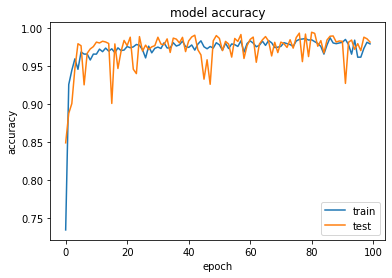

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

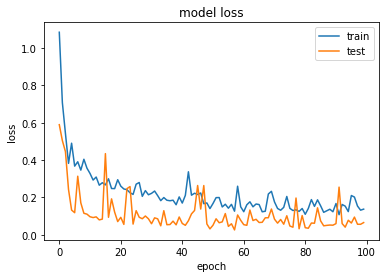

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## **Evaluation**

In [ ]:
# Evaluation phase

# Use the testing set to evaluate the model
scores = model.evaluate(X_train,y_train)

# Print out the accuracy
print('\n')
print('Accuracy=', scores[1])

6231/6231 [==============================] - 6s 922us/step - loss: 0.0629 - accuracy: 0.9821


Accuracy= 0.982088029384613


## **Prediction**

In [ ]:
y_pred[:5].astype('int64')

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
output= pd.DataFrame({}

In [ ]:
y_test[:5]

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64